In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from pycaret.classification import *
import constants
from joblib import load

In [2]:
# Load the scores
left_scores = np.load('left_scores_dict.npy', allow_pickle=True).item()
right_scores = np.load('right_scores_dict.npy', allow_pickle=True).item()

In [3]:
# Parse the the dictionaries into a format that can be translated to pandas
# DataFrame
better_left_dict = defaultdict(list)
better_right_dict = defaultdict(list)

for key in left_scores:
    folds_results_list = left_scores[key]
    for f1, acc, clc in folds_results_list:
        better_left_dict[f'{key}_f1'].append(f1)
        better_left_dict[f'{key}_acc'].append(acc)


for key in right_scores:
    folds_results_list = right_scores[key]
    for f1, acc, clc in folds_results_list:
        better_right_dict[f'{key}_f1'].append(f1)
        better_right_dict[f'{key}_acc'].append(acc)


In [4]:
df_left = pd.DataFrame(better_left_dict)
df_right = pd.DataFrame(better_right_dict)

In [5]:
df_left.head()

,rf_f1,rf_acc,lg_f1,lg_acc,xgb_f1,xgb_acc,xgbrf_f1,xgbrf_acc,nb_f1,nb_acc,rsvm_f1,rsvm_acc,lsvm_f1,lsvm_acc
0,0.627702,0.564978,0.679596,0.618849,0.613646,0.548256,0.646464,0.581223,0.601279,0.542164,0.530222,0.5,0.670769,0.613235
1,0.639745,0.572405,0.710583,0.644933,0.662347,0.595116,0.664776,0.594750,0.673762,0.611966,0.536473,0.5,0.689297,0.628571
2,0.628893,0.566667,0.653163,0.583639,0.659077,0.589255,0.583796,0.517216,0.630190,0.561905,0.536473,0.5,0.608821,0.539560
3,0.572235,0.521256,0.566464,0.503865,0.572664,0.509179,0.530834,0.482850,0.542810,0.482126,0.527069,0.5,0.572664,0.509179
4,0.566809,0.521498,0.636002,0.574396,0.627032,0.563768,0.610542,0.547826,0.641854,0.579952,0.527069,0.5,0.630156,0.568841


In [6]:
df_right.head()

,rf_f1,rf_acc,lg_f1,lg_acc,xgb_f1,xgb_acc,xgbrf_f1,xgbrf_acc,nb_f1,nb_acc,rsvm_f1,rsvm_acc,lsvm_f1,lsvm_acc
0,0.592245,0.532250,0.671951,0.608098,0.612695,0.548017,0.623854,0.559365,0.609517,0.547778,0.530222,0.5,0.661480,0.602365
1,0.641268,0.572527,0.700613,0.633822,0.667673,0.606471,0.670309,0.600366,0.704832,0.645177,0.536473,0.5,0.698235,0.633944
2,0.634398,0.566911,0.616563,0.550305,0.659077,0.589255,0.566454,0.500611,0.646268,0.578510,0.536473,0.5,0.613204,0.544933
3,0.539226,0.493961,0.576676,0.514976,0.610542,0.547826,0.553637,0.504831,0.554771,0.492995,0.527069,0.5,0.577903,0.514734
4,0.599440,0.542995,0.605244,0.541787,0.671459,0.617633,0.598848,0.536957,0.661632,0.601691,0.527069,0.5,0.602897,0.541304


In [7]:
df_left.mean(), df_right.mean()

(rf_f1        0.592623
 rf_acc       0.535835
 lg_f1        0.643206
 lg_acc       0.578050
 xgb_f1       0.619902
 xgb_acc      0.554947
 xgbrf_f1     0.604033
 xgbrf_acc    0.541379
 nb_f1        0.615976
 nb_acc       0.551977
 rsvm_f1      0.531461
 rsvm_acc     0.500000
 lsvm_f1      0.643126
 lsvm_acc     0.579921
 dtype: float64,
 rf_f1        0.604120
 rf_acc       0.544835
 lg_f1        0.631557
 lg_acc       0.566052
 xgb_f1       0.634279
 xgb_acc      0.569773
 xgbrf_f1     0.606060
 xgbrf_acc    0.542901
 nb_f1        0.625298
 nb_acc       0.561247
 rsvm_f1      0.532132
 rsvm_acc     0.500444
 lsvm_f1      0.644203
 lsvm_acc     0.580188
 dtype: float64)

In [8]:
df_left.std()

rf_f1        0.029661
rf_acc       0.025079
lg_f1        0.032703
lg_acc       0.033392
xgb_f1       0.031603
xgb_acc      0.031465
xgbrf_f1     0.031684
xgbrf_acc    0.029197
nb_f1        0.034340
nb_acc       0.036112
rsvm_f1      0.004339
rsvm_acc     0.000000
lsvm_f1      0.033709
lsvm_acc     0.035615
dtype: float64

In [9]:
df_right.std()

rf_f1        0.026744
rf_acc       0.022928
lg_f1        0.028951
lg_acc       0.028537
xgb_f1       0.035874
xgb_acc      0.037144
xgbrf_f1     0.031875
xgbrf_acc    0.030530
nb_f1        0.036404
nb_acc       0.038434
rsvm_f1      0.006088
rsvm_acc     0.002222
lsvm_f1      0.029673
lsvm_acc     0.029608
dtype: float64

In [10]:
data_df = pd.read_csv(constants.DATADIR_aparc, index_col=0)
data_df.pop('age')
data_df.pop('sex')

SDSU_0050197       1.0
CMU_b_0050657      1.0
CMU_b_0050658      1.0
CMU_b_0050661      2.0
CMU_b_0050667      1.0
                  ... 
CMU_b_0050648      2.0
Caltech_0051474    1.0
SDSU_0050183       1.0
SDSU_0050185       2.0
SDSU_0050192       1.0
Name: sex, Length: 797, dtype: float64

In [11]:
exp_clf102 = setup(data = data_df, target = 'labels', session_id=123,
                  normalize = False, 
                  transformation = False, 
                  ignore_low_variance = False, fix_imbalance=False,
                  remove_multicollinearity = False, multicollinearity_threshold = 0.95)
#                   bin_numeric_features = ['LIMIT_BAL', 'AGE'],
#                   group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
#                                    ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]) 

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:58:06
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
thick_lbankssts_med,Numeric
thick_lbankssts_20-80range,Numeric
thick_lcaudalanteriorcingulate_med,Numeric
thick_lcaudalanteriorcingulate_20-80range,Numeric
thick_lcaudalmiddlefrontal_med,Numeric
...,...
vol_rtransversetemporal_med,Numeric
vol_rtransversetemporal_20-80range,Numeric
vol_rinsula_med,Numeric
vol_rinsula_20-80range,Numeric


KeyboardInterrupt: Interrupted by user

In [ ]:
compare_models()

In [ ]:
data_df[data_df['labels']==1].shape

In [ ]:
data_df[data_df['labels']==0].shape

In [ ]:
511/(286+511)

In [ ]:
clean_left_df = pd.read_csv('clean_left.csv', index_col=0)
clean_right_df = pd.read_csv('clean_right.csv', index_col=0)


In [ ]:
exp_clf102 = setup(data = clean_left_df, target = 'labels', session_id=123,
                  normalize = False, 
                  transformation = False, 
                  ignore_low_variance = False, fix_imbalance=False,
                  remove_multicollinearity = False, multicollinearity_threshold = 0.95)
#                   bin_numeric_features = ['LIMIT_BAL', 'AGE'],
#                   group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
#                                    ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]) 

In [ ]:
compare_models()

In [ ]:
exp_clf102 = setup(data = clean_right_df, target = 'labels', session_id=123,
                  normalize = False, 
                  transformation = False, 
                  ignore_low_variance = False, fix_imbalance=False,
                  remove_multicollinearity = False, multicollinearity_threshold = 0.95)
#                   bin_numeric_features = ['LIMIT_BAL', 'AGE'],
#                   group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
#                                    ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]) 

In [ ]:
compare_models()

In [ ]:
lg = create_model('ridge')

In [ ]:
lr = tune_model(lg)

In [ ]:
coef_norm = lr.coef_.T/np.max(lr.coef_)
np.argmax(coef_norm)

In [ ]:
coef_norm[84] = -1

In [ ]:
np.argmax(coef_norm)

In [ ]:
clean_left_df.columns[84]

In [ ]:
clean_left_df.columns[124]

In [2]:
df = pd.read_csv('D:\\PhD\\Data\\aparc\\all_data.csv', index_col=0)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.columns

Index(['thick_lbankssts_med', 'thick_lbankssts_20-80range',
       'thick_lcaudalanteriorcingulate_med',
       'thick_lcaudalanteriorcingulate_20-80range',
       'thick_lcaudalmiddlefrontal_med',
       'thick_lcaudalmiddlefrontal_20-80range', 'thick_lcuneus_med',
       'thick_lcuneus_20-80range', 'thick_lentorhinal_med',
       'thick_lentorhinal_20-80range',
       ...
       'vol_rfrontalpole_20-80range', 'vol_rtemporalpole_med',
       'vol_rtemporalpole_20-80range', 'vol_rtransversetemporal_med',
       'vol_rtransversetemporal_20-80range', 'vol_rinsula_med',
       'vol_rinsula_20-80range', 'age', 'sex', 'labels'],
      dtype='object', length=547)

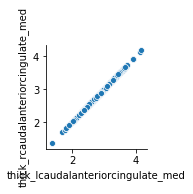

In [15]:
sns.pairplot(x_vars='thick_lcaudalanteriorcingulate_med', y_vars='thick_rcaudalanteriorcingulate_med', data=df)

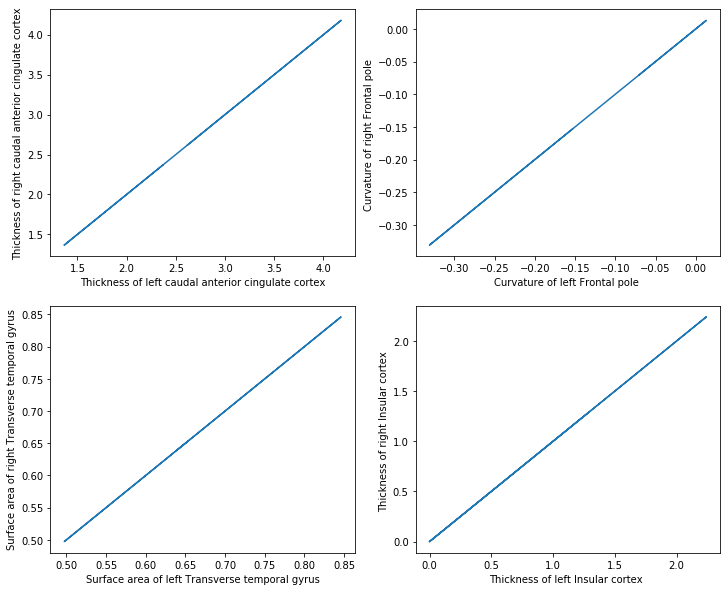

In [16]:
# st.use('fast')
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes[0][0].plot(df['thick_lcaudalanteriorcingulate_med'],
                df['thick_rcaudalanteriorcingulate_med'], label='Thickness_Caudalanteriorcingulate')
axes[0][0].set_xlabel('Thickness of left caudal anterior cingulate cortex')
axes[0][0].set_ylabel('Thickness of right caudal anterior cingulate cortex')

axes[0][1].plot(df['curv_rfrontalpole_med'],
                df['curv_lfrontalpole_med'], label='Curvature_Frontalpole')
axes[0][1].set_xlabel('Curvature of left Frontal pole ')
axes[0][1].set_ylabel('Curvature of right Frontal pole ')

axes[1][0].plot(df['area_rtransversetemporal_med'],
                df['area_ltransversetemporal_med'], label='Area_Transversetemporal')
axes[1][0].set_xlabel('Surface area of left Transverse temporal gyrus')
axes[1][0].set_ylabel('Surface area of right Transverse temporal gyrus')

axes[1][1].plot(df['thick_linsula_med'],
                df['thick_rinsula_med'], label='Thickness_Insula')
axes[1][1].set_xlabel('Thickness of left Insular cortex ')
axes[1][1].set_ylabel('Thickness of right Insular cortex ')
plt.show()

In [ ]:
import matplotlib.style as st

In [ ]:
st.available

In [17]:
df.shape

(797, 547)

In [18]:
544/(68*2)

4.0

In [3]:
df[df['labels']==1].shape

(286, 547)

In [4]:
df[df['labels']==0].shape

(511, 547)

In [13]:
obj_left = load('RFECV_RandomForestClassifier_left_2020-09-05_17-48-33.joblib')
obj_right = load('RFECV_RandomForestClassifier_right_2020-09-05_18-02-51.joblib')
obj_left_1svc = load('RFECV_LinearSVC_left_hier_2020-09-07_00-22-59.joblib')
obj_left_2svc = load('RFECV_LinearSVC_left_hier_2020-09-07_00-24-18.joblib')
obj_left_3svc = load('RFECV_LinearSVC_left_hier_2020-09-07_00-25-13.joblib')

obj_left_1rf = load('RFECV_RandomForestClassifier_left_hier_2020-09-06_23-55-39.joblib')
obj_left_2rf = load('RFECV_RandomForestClassifier_left_hier_2020-09-07_00-07-54.joblib')
obj_left_3rf = load('RFECV_RandomForestClassifier_left_hier_2020-09-07_00-20-13.joblib')


In [6]:
fig, axes = plt.subplots(1,2,sharey=True,figsize(12,10))
axes[0].plot(range(1, len(obj_left.grid_scores_)+1), obj_left.grid_scores_, label='Left hemisphere')
axes[1].plot(range(1, len(obj_right.grid_scores_)+1), obj_right.grid_scores_, label='Right hemisphere')
axes[1].set_xlabel('Feature index')
axes[0].set_ylabel('balanced accuracy')


SyntaxError: invalid syntax (<ipython-input-6-fa89193f3ee7>, line 5)

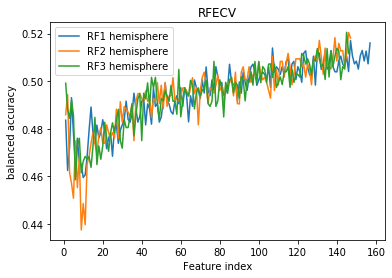

In [16]:
# plt.plot(range(1, len(obj_left_1svc.grid_scores_)+1), obj_left_1svc.grid_scores_, label='SVM1 hemisphere')
# plt.plot(range(1, len(obj_left_2svc.grid_scores_)+1), obj_left_2svc.grid_scores_, label='SVM2 hemisphere')
# plt.plot(range(1, len(obj_left_3svc.grid_scores_)+1), obj_left_3svc.grid_scores_, label='SVM3 hemisphere')

plt.plot(range(1, len(obj_left_1rf.grid_scores_)+1), obj_left_1rf.grid_scores_, label='RF1 hemisphere')
plt.plot(range(1, len(obj_left_2rf.grid_scores_)+1), obj_left_2rf.grid_scores_, label='RF2 hemisphere')
plt.plot(range(1, len(obj_left_3rf.grid_scores_)+1), obj_left_3rf.grid_scores_, label='RF3 hemisphere')

plt.xlabel('Feature index')
plt.ylabel('balanced accuracy')
plt.title('RFECV')
plt.legend()
plt.show()

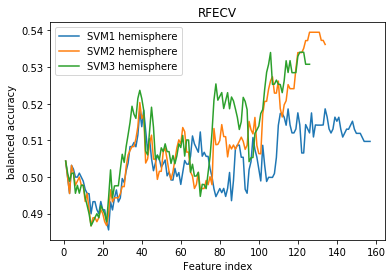

In [17]:
plt.plot(range(1, len(obj_left_1svc.grid_scores_)+1), obj_left_1svc.grid_scores_, label='SVM1 hemisphere')
plt.plot(range(1, len(obj_left_2svc.grid_scores_)+1), obj_left_2svc.grid_scores_, label='SVM2 hemisphere')
plt.plot(range(1, len(obj_left_3svc.grid_scores_)+1), obj_left_3svc.grid_scores_, label='SVM3 hemisphere')

# plt.plot(range(1, len(obj_left_1rf.grid_scores_)+1), obj_left_1rf.grid_scores_, label='RF1 hemisphere')
# plt.plot(range(1, len(obj_left_2rf.grid_scores_)+1), obj_left_2rf.grid_scores_, label='RF2 hemisphere')
# plt.plot(range(1, len(obj_left_3rf.grid_scores_)+1), obj_left_3rf.grid_scores_, label='RF3 hemisphere')

plt.xlabel('Feature index')
plt.ylabel('balanced accuracy')
plt.title('RFECV')
plt.legend()
plt.show()

In [22]:
import os
import constants

In [23]:
main_dir = './Results/ML'
obj_left_rf = load(os.path.join(main_dir, "clf_left_rf.joblib"))
obj_right_rf = load(os.path.join(main_dir, "clf_right_rf.joblib"))
obj_left_svm = load(os.path.join(main_dir, "clf_left_svm.joblib"))
obj_right_svm = load(os.path.join(main_dir, "clf_right_svm.joblib"))

In [34]:
obj_left_rf.keys()

dict_keys(['lSVM', 'pagg', 'lg', 'XGB', 'GNB', 'Rf', 'SVC'])

In [107]:
obj_left_rf['Rf'].cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bootstrap', 'param_criterion', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [111]:
len(obj_left_rf['Rf'].cv_results_['mean_train_score'])

720

In [36]:
obj_left_rf['lSVM'].best_score_

0.57696607740086

In [37]:
obj_left_rf['pagg'].best_score_

0.6011095185008228

In [38]:
obj_left_rf['lg'].best_score_

0.5880161384509209

In [39]:
obj_left_rf['SVC'].best_score_

0.6082056590752243

In [40]:
obj_left_rf['XGB'].best_score_

0.5673997982693636

In [41]:
obj_right_rf['lSVM'].best_score_

0.5965912831130222

In [42]:
obj_right_rf['Rf'].best_score_

0.5021739130434784

In [43]:
obj_left_rf['pagg'].best_score_

0.6011095185008228

In [46]:
obj_left_svm['pagg'].best_score_

0.5980304719435154

In [47]:
obj_left_svm['Rf'].best_score_

0.5043961352657005

In [48]:
obj_left_svm['SVC'].best_score_

0.600358337314859

# Feature selection part analysis
## Q1: Does the features vary between left and right hemispheres?
## Q2: Does the features vary on using SVM or RF?
## Q3: Which one of four has the highest grid score?

In [26]:
# Load all data
FS_DIR_LR = './Results/FS/left_rf_modifiedMedPIQR.joblib'
FS_DIR_RR = './Results/FS/right_rf_modifiedMedPIQR.joblib'
FS_DIR_LS = './Results/FS/left_svc_modifiedMedPIQR.joblib'
FS_DIR_RS = './Results/FS/right_svc_modifiedMedPIQR.joblib'

# Input matrices to the FS (coming from correlation analysis)
df_left = pd.read_csv('./Results/CORR_ANA/left_train_noColliniarity_modifiedMedPIQR.csv', index_col=0)
df_right = pd.read_csv('./Results/CORR_ANA/right_train_noColliniarity_modifiedMedPIQR.csv', index_col=0)


LR_obj = load(FS_DIR_LR)
RR_obj = load(FS_DIR_RR)
LS_obj = load(FS_DIR_LS)
RS_obj = load(FS_DIR_RS)

In [27]:
df_clean_LR = df_left.iloc[:, np.where(LR_obj.ranking_==1)[0]]
df_clean_RR = df_right.iloc[:, np.where(RR_obj.ranking_==1)[0]]
df_clean_LS = df_left.iloc[:, np.where(LS_obj.ranking_==1)[0]]
df_clean_RS = df_right.iloc[:, np.where(RS_obj.ranking_==1)[0]]

## Answer to question 1

In [28]:
# Get all selected features from all data matrices
f_LR = df_clean_LR.columns.to_list()
f_RR = df_clean_RR.columns.to_list()
f_LS = df_clean_LS.columns.to_list()
f_RS = df_clean_RS.columns.to_list()

In [29]:
# Change left and right names to keep only brain region and morphology
# without the added l and r
def remove_l_r_fromname(list_of_names):
    updated_names = []
    for name in list_of_names:
        nl = name.split('_')
        lrpos = nl[1]
        lrpos = lrpos[1:]
        nl[1] = lrpos
        updated_names.append('_'.join(nl))
    return updated_names
temp_list = f_LR[3:5]+f_RR[10:15]


In [30]:
remove_l_r_fromname(temp_list)

['thick_fusiform_medPIQR',
 'thick_isthmuscingulate_medMIQR',
 'thick_posteriorcingulate_medMIQR',
 'thick_rostralanteriorcingulate_medMIQR',
 'thick_rostralanteriorcingulate_medPIQR',
 'thick_frontalpole_medMIQR',
 'thick_temporalpole_medMIQR']

In [31]:
def find_matchings(f_LR, f_RR):
    updated_f_LR = remove_l_r_fromname(f_LR)
    updated_f_RR = remove_l_r_fromname(f_RR)
    common_featsLR = []
    common_featsRR = []
    only_LR_feats = []
    only_RR_feats = []
    for feat_LR in updated_f_LR:
        if feat_LR in updated_f_RR:
            common_featsLR.append(feat_LR)
        else:
            only_LR_feats.append(feat_LR)

    for feat_RR in updated_f_RR:
        if feat_RR in updated_f_LR:
            common_featsRR.append(feat_RR)
        else:
            only_RR_feats.append(feat_RR)
    return common_featsLR, common_featsRR, only_LR_feats, only_RR_feats

In [32]:
print(len(f_LR),len(f_RR))

common_featsLR, common_featsRR, only_LR_feats, only_RR_feats =\
find_matchings(f_LR, f_RR)
common_featsLR==common_featsRR, len(common_featsLR), len(only_LR_feats), len(only_RR_feats)

158 115


(True, 115, 43, 0)

In [33]:
only_LR_feats

['thick_caudalanteriorcingulate_medMIQR',
 'thick_cuneus_medMIQR',
 'thick_entorhinal_medMIQR',
 'thick_parsorbitalis_medMIQR',
 'curv_caudalanteriorcingulate_medPIQR',
 'curv_caudalmiddlefrontal_medMIQR',
 'curv_caudalmiddlefrontal_medPIQR',
 'curv_inferiorparietal_medMIQR',
 'curv_inferiorparietal_medPIQR',
 'curv_inferiortemporal_medMIQR',
 'curv_isthmuscingulate_medPIQR',
 'curv_lingual_medPIQR',
 'curv_medialorbitofrontal_medPIQR',
 'curv_parahippocampal_medMIQR',
 'curv_parahippocampal_medPIQR',
 'curv_paracentral_medPIQR',
 'curv_parstriangularis_medPIQR',
 'curv_pericalcarine_medMIQR',
 'curv_postcentral_medPIQR',
 'curv_rostralmiddlefrontal_medPIQR',
 'curv_superiorfrontal_medMIQR',
 'curv_superiorfrontal_medPIQR',
 'curv_superiorparietal_medPIQR',
 'curv_frontalpole_medPIQR',
 'curv_temporalpole_medPIQR',
 'area_caudalanteriorcingulate_medMIQR',
 'area_entorhinal_medPIQR',
 'area_inferiortemporal_medMIQR',
 'area_isthmuscingulate_medMIQR',
 'area_lateraloccipital_medMIQR',
 '

In [34]:
only_RR_feats

[]

In [35]:
common_featsLS, common_featsRS, only_LS_feats, only_RS_feats =\
find_matchings(f_LS, f_RS)

In [36]:
print(len(f_LS),len(f_RS))
common_featsLS==common_featsRS, len(common_featsLS), len(only_LS_feats), len(only_RS_feats)

66 66


(True, 66, 0, 0)

In [37]:
common_featsLS, common_featsLR, only_LS_feats, only_LR_feats =\
find_matchings(f_LS, f_LR)

In [38]:
print(len(f_LS),len(f_LR))
common_featsLS==common_featsLR, len(common_featsLS), len(only_LS_feats), len(only_LR_feats)

66 158


(True, 66, 0, 92)

In [39]:
only_LS_feats

[]

In [40]:
only_LR_feats

['thick_caudalanteriorcingulate_medMIQR',
 'thick_entorhinal_medMIQR',
 'thick_isthmuscingulate_medMIQR',
 'thick_isthmuscingulate_medPIQR',
 'thick_lingual_medMIQR',
 'thick_parahippocampal_medMIQR',
 'thick_parsorbitalis_medMIQR',
 'thick_pericalcarine_medMIQR',
 'thick_rostralanteriorcingulate_medMIQR',
 'thick_rostralanteriorcingulate_medPIQR',
 'thick_frontalpole_medMIQR',
 'thick_temporalpole_medMIQR',
 'curv_bankssts_medPIQR',
 'curv_caudalanteriorcingulate_medMIQR',
 'curv_caudalanteriorcingulate_medPIQR',
 'curv_caudalmiddlefrontal_medMIQR',
 'curv_caudalmiddlefrontal_medPIQR',
 'curv_cuneus_medMIQR',
 'curv_cuneus_medPIQR',
 'curv_inferiorparietal_medPIQR',
 'curv_inferiortemporal_medMIQR',
 'curv_isthmuscingulate_medMIQR',
 'curv_isthmuscingulate_medPIQR',
 'curv_lateraloccipital_medMIQR',
 'curv_lingual_medPIQR',
 'curv_medialorbitofrontal_medPIQR',
 'curv_parahippocampal_medMIQR',
 'curv_parahippocampal_medPIQR',
 'curv_parsopercularis_medMIQR',
 'curv_parsopercularis_medP

In [41]:
common_featsRS, common_featsRR, only_RS_feats, only_RR_feats =\
find_matchings(f_RS, f_RR)

In [42]:
print(len(f_RS),len(f_RR))
common_featsRS==common_featsRR, len(common_featsRS), len(only_RS_feats), len(only_RR_feats)

66 115


(True, 57, 9, 58)

In [43]:
only_RS_feats

['thick_cuneus_medMIQR',
 'curv_inferiorparietal_medMIQR',
 'curv_paracentral_medPIQR',
 'curv_superiorparietal_medPIQR',
 'area_isthmuscingulate_medMIQR',
 'area_lateraloccipital_medMIQR',
 'area_middletemporal_medMIQR',
 'area_precuneus_medMIQR',
 'vol_parahippocampal_medMIQR']

In [44]:
only_RR_feats

['thick_isthmuscingulate_medMIQR',
 'thick_isthmuscingulate_medPIQR',
 'thick_lingual_medMIQR',
 'thick_parahippocampal_medMIQR',
 'thick_pericalcarine_medMIQR',
 'thick_rostralanteriorcingulate_medMIQR',
 'thick_rostralanteriorcingulate_medPIQR',
 'thick_frontalpole_medMIQR',
 'thick_temporalpole_medMIQR',
 'curv_bankssts_medPIQR',
 'curv_caudalanteriorcingulate_medMIQR',
 'curv_cuneus_medMIQR',
 'curv_cuneus_medPIQR',
 'curv_isthmuscingulate_medMIQR',
 'curv_lateraloccipital_medMIQR',
 'curv_parsopercularis_medMIQR',
 'curv_parsopercularis_medPIQR',
 'curv_parsorbitalis_medMIQR',
 'curv_pericalcarine_medPIQR',
 'curv_postcentral_medMIQR',
 'curv_posteriorcingulate_medMIQR',
 'curv_precentral_medMIQR',
 'curv_precuneus_medMIQR',
 'curv_precuneus_medPIQR',
 'curv_rostralmiddlefrontal_medMIQR',
 'curv_superiorparietal_medMIQR',
 'curv_supramarginal_medMIQR',
 'curv_frontalpole_medMIQR',
 'curv_transversetemporal_medPIQR',
 'area_bankssts_medPIQR',
 'area_caudalanteriorcingulate_medPIQR'

## Observations/Conclusions
### Differences across features on using RFECV-RF
* Number of left hemisphere selected features: 158
* Number of right hemisphere selected features: 115
* Number of common features (morphology+brain reg): 15
* Number of unique features for left hemisphere: 43
* Number of unique features for right hemisphere: 0


### Differences across features on using RFECV-SVM
* Number of left hemisphere selected features: 66
* Number of right hemisphere selected features: 66
* Number of common features (morphology+brain reg): 66
* Number of unique features for left hemisphere: 0
* Number of unique features for right hemisphere: 0

### Differences across features on using Left hemisphere
* Number of RFECV-SVM selected features: 66
* Number of RFECV-RF selected features: 158
* Number of common features (morphology+brain reg): 57
* Number of unique features for RFECV-SVM: 0
* Number of unique features for RFECV-RF: 92

### Differences across features on using Right hemisphere
* Number of RFECV-SVM selected features: 66
* Number of RFECV-RF selected features: 115
* Number of common features (morphology+brain reg): 119
* Number of unique features for RFECV-SVM: 9
* Number of unique features for RFECV-RF: 58

## Conclusions:
* It is obvious that the changes due to SVM/RF is much greater than the differences due to Left or right hemisphere. Substantially, this is because of how we model our data, either as a linearly seperable data and we are looking for the set of feature that will linearly separate the data, or non-linearly separable data and we are looking for the set of features that will separate them on a decision tree.

***
## Correlation analysis part analysis
### At each of the following levels (0.5, 0.6, 0.7, 0.85)
### Q1: How many features are removed from each hemisphere?
### Q2: Are the features removed from each hemisphere are the same?
### Q3: Which might be an optimum threshold?

#### Note that: Each hemisphere has 272 features $34 (brain regions) \times 8 (morhological features)$

In [52]:
# load files
left_corr_50_file = "./Results/CORR_ANA/left_train_noColliniarity_modifiedMedPIQR_50.csv"
right_corr_50_file = "./Results/CORR_ANA/right_train_noColliniarity_modifiedMedPIQR_50.csv"

left_corr_60_file = "./Results/CORR_ANA/left_train_noColliniarity_modifiedMedPIQR_60.csv"
right_corr_60_file = "./Results/CORR_ANA/right_train_noColliniarity_modifiedMedPIQR_60.csv"

left_corr_70_file = "./Results/CORR_ANA/left_train_noColliniarity_modifiedMedPIQR_70.csv"
right_corr_70_file = "./Results/CORR_ANA/right_train_noColliniarity_modifiedMedPIQR_70.csv"

left_corr_85_file = "./Results/CORR_ANA/left_train_noColliniarity_modifiedMedPIQR_85.csv"
right_corr_85_file = "./Results/CORR_ANA/right_train_noColliniarity_modifiedMedPIQR_85.csv"

df_left_corr_50 = pd.read_csv(left_corr_50_file, index_col=0).drop('labels', axis=1)
df_right_corr_50 = pd.read_csv(right_corr_50_file, index_col=0).drop('labels', axis=1)

df_left_corr_60 = pd.read_csv(left_corr_60_file, index_col=0).drop('labels', axis=1)
df_right_corr_60 = pd.read_csv(right_corr_60_file, index_col=0).drop('labels', axis=1)


df_left_corr_70 = pd.read_csv(left_corr_70_file, index_col=0).drop('labels', axis=1)
df_right_corr_70 = pd.read_csv(right_corr_70_file, index_col=0).drop('labels', axis=1)


df_left_corr_85 = pd.read_csv(left_corr_85_file, index_col=0).drop('labels', axis=1)
df_right_corr_85 = pd.read_csv(right_corr_85_file, index_col=0).drop('labels', axis=1)

In [54]:
# 0.5 threshold analysis
left_feats50 = df_left_corr_50.columns.to_list()
right_feats50 = df_right_corr_50.columns.to_list()
print(len(left_feats50),len(right_feats50))

common_featsL50, common_featsR50, only_L_feats50, only_R_feats50 =\
find_matchings(left_feats50, right_feats50)
common_featsL50==common_featsR50, len(common_featsL50), len(only_L_feats50), len(only_R_feats50)

99 99


(True, 99, 0, 0)

In [55]:
# 0.6 threshold analysis
left_feats60 = df_left_corr_60.columns.to_list()
right_feats60 = df_right_corr_60.columns.to_list()
print(len(left_feats60),len(right_feats60))

common_featsL60, common_featsR60, only_L_feats60, only_R_feats60 =\
find_matchings(left_feats60, right_feats60)
common_featsL60==common_featsR60, len(common_featsR60), len(only_L_feats60), len(only_R_feats60)

138 138


(True, 138, 0, 0)

In [56]:
# 0.7 threshold analysis
left_feats70 = df_left_corr_70.columns.to_list()
right_feats70 = df_right_corr_70.columns.to_list()
print(len(left_feats70),len(right_feats70))

common_featsL70, common_featsR70, only_L_feats70, only_R_feats70 =\
find_matchings(left_feats70, right_feats70)
common_featsL70==common_featsR70, len(common_featsR70), len(only_L_feats70), len(only_R_feats70)

185 185


(True, 185, 0, 0)

In [57]:
# 0.85 threshold analysis
left_feats85 = df_left_corr_85.columns.to_list()
right_feats85 = df_right_corr_85.columns.to_list()
print(len(left_feats85),len(right_feats85))

common_featsL85, common_featsR85, only_L_feats85, only_R_feats85 =\
find_matchings(left_feats85, right_feats85)
common_featsL85==common_featsR85, len(common_featsL85), len(only_L_feats85), len(only_R_feats85)

252 252


(True, 252, 0, 0)